In [101]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np
import h5py
from keras.callbacks import History 
history = History()
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import keras
from keras.utils import np_utils
# K.set_image_dim_ordering('th')

In [102]:
# variables
image_size = 32

In [103]:
from PIL import Image
import os
import numpy as np
from os import listdir
from scipy.misc import imshow
import scipy.misc
from numpy import *
import PIL


def preprocess_image(infilename,size):
    data = Image.open(infilename)#.convert('L')
#     data = scipy.misc.imread(infilename, mode = "L")
    data.thumbnail((size,size), Image.ANTIALIAS)
    img = data.resize((image_size,image_size))
    scipy.misc.imsave(infilename, img)
    
def load_image( infilename ) :
#     data = Image.open(infilename)#.convert('L')
    data = scipy.misc.imread(infilename, mode = "RGB")
#     data.thumbnail((32,32), Image.ANTIALIAS)
#     img = data.resize((image_size,image_size))
#     preprocess_image(infilename,size)
#     data.save(infilename, "JPEG")
    #img = Image.open(infilename)
    #if numberOfColorChannels < 3:
      #  print(infilename)
#     if img.mode != "RGB":
#         img = img.convert('RGB')
#         img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    
    #img.load()
#     scipy.misc.imsave(infilename, img)
    #data = np.asarray(img, dtype="float32" )
    #img.close()
    
    return data

path = ['Dataset/imgflip_images', 'Dataset/greetings_images','Dataset/scanned_documents','Dataset/imp_images']

Y = []
X = []
data = []

for p in path:
    for files in listdir(p):
        #print(files)
        try:
            t = load_image(p+'/'+files)
            X = t
            Y = (float(path.index(p)))
            data.append((X,Y))
        except:
            print("error reading file:"+ files)

In [104]:
#Xtemp = np.uint8(X)
import random
import matplotlib.pyplot as plt
random.shuffle(data)

X = []
Y = []

for d in data:
    X.append(d[0])
    Y.append(d[1])

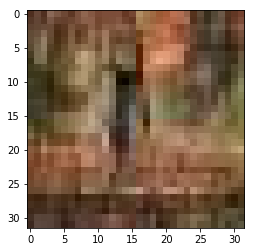

3.0


In [105]:
#Xtemp = np.uint8(X)

import matplotlib.pyplot as plt
plt.imshow(np.uint8(X[6]))
plt.show()
print(Y[6])

## Pre processing

In [108]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
totalSize = len(X)
trainingSize = int(0.8*totalSize)
# load data
X_train = np.array(X[:trainingSize])
y_train = np.array(Y[:trainingSize])
X_test = np.array(X[trainingSize:])
y_test = np.array(Y[trainingSize:])
X_train = X_train / 255.0
X_test = X_test / 255.0

# # reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 3, image_size, image_size).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 3, image_size, image_size).astype('float32')
# normalize inputs from 0-255 to 0-1

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [109]:
#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

ValueError: Dimension 1 in both shapes must be equal, but are 3 and 64 for 'Assign_136' (op: 'Assign') with input shapes: [3,3,3,64], [3,64,3,3].

In [72]:
#Create your own input format (here 3x200x200)
input_size = 32
input = Input(shape=(X_train[0].shape),name = 'image_input')
print(input.shape)

(?, 32, 32, 3)


In [80]:
#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)
# output_vgg16_conv = K.reshape(output_vgg16_conv,(-1,512,1,1)) 

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dense(512, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(input=input, output=x,data_format = channels_first)
# Compile model
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()

#Then training with your data ! 

/home/kriti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  if sys.path[0] == '':


AttributeError: 'NoneType' object has no attribute 'inbound_nodes'

In [78]:
output_vgg16_conv.shape

TensorShape([Dimension(None), Dimension(1), Dimension(1), Dimension(512)])

In [74]:
from keras.preprocessing.image import ImageDataGenerator

In [75]:
dropout = 0.7
model = my_model
# Fit the model
from keras import preprocessing
# For preprocessing
datagen = ImageDataGenerator(featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())


In [77]:
X_test[0].shape

(32, 32, 3)

In [68]:
epochs = 10
#model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test),
 #                   steps_per_epoch=len(X_train) / 32, epochs=epochs,callbacks = [history])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=200, callbacks = [history])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

ValueError: Error when checking input: expected image_input to have shape (None, 32, 32, 3) but got array with shape (3936, 3, 32, 32)